<a href="https://colab.research.google.com/github/Sreeja-kotra/CVIP-Speech-Emotion-Recognition/blob/main/speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
Root = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data"
os.chdir(Root)

In [ ]:
ls

Actor_01/  Actor_06/  Actor_11/  Actor_16/  Actor_21/
Actor_02/  Actor_07/  Actor_12/  Actor_17/  Actor_22/
Actor_03/  Actor_08/  Actor_13/  Actor_18/  Actor_23/
Actor_04/  Actor_09/  Actor_14/  Actor_19/  Actor_24/
Actor_05/  Actor_10/  Actor_15/  Actor_20/  modelForPrediction1.sav


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    X, sample_rate = librosa.load(file_name, dtype="float32")

    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=1)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=sample_rate), axis=1)
        result = np.hstack((result, chroma))
    if mel:
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate), axis=1)
        result = np.hstack((result, mels))
    return result


In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, )
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-6.18778870e+02,  7.06069717e+01, -1.08574591e+01, ...,
         1.33275281e-13,  1.30448834e-13,  1.28555898e-13],
       [-4.36877502e+02,  2.69113617e+01, -4.32013359e+01, ...,
         4.53895437e-15,  3.22301559e-14,  2.43106909e-14],
       [-6.67478271e+02,  6.07558136e+01, -1.94795341e+01, ...,
         3.69681601e-15,  3.44815445e-15,  3.28995898e-15],
       ...,
       [-5.90424500e+02,  7.34954834e+01, -7.11697102e+00, ...,
         9.43836751e-14,  9.29030277e-14,  9.17796248e-14],
       [-5.86794373e+02,  6.48515396e+01, -2.60383072e+01, ...,
         1.30361227e-12,  1.28859998e-12,  1.27881755e-12],
       [-6.21448181e+02,  6.49990692e+01, -1.89727345e+01, ...,
         3.65165228e-13,  3.59892617e-13,  3.56313801e-13]])

In [ ]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 153


In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['happy', 'happy', 'happy', 'calm', 'happy', 'disgust', 'happy',
       'happy', 'disgust', 'calm', 'disgust', 'fearful', 'happy', 'calm',
       'calm', 'disgust', 'fearful', 'happy', 'disgust', 'happy', 'happy',
       'fearful', 'happy', 'happy', 'happy', 'calm', 'happy', 'happy',
       'calm', 'fearful', 'happy', 'disgust', 'happy', 'happy', 'disgust',
       'happy', 'happy', 'happy', 'happy', 'calm', 'happy', 'happy',
       'happy', 'disgust', 'happy', 'fearful', 'disgust', 'happy', 'calm',
       'happy', 'disgust', 'fearful', 'fearful', 'fearful', 'happy',
       'fearful', 'fearful', 'happy', 'disgust', 'happy', 'fearful',
       'happy', 'happy', 'calm', 'happy', 'happy', 'disgust', 'disgust',
       'happy', 'calm', 'happy', 'happy', 'happy', 'happy', 'happy',
       'fearful', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy', 'calm', 'calm', 'disgust',
       'happy', 'disgust', 'happy', 'disgust', 'happy', 'happy', 'ha

In [ ]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 49.48%


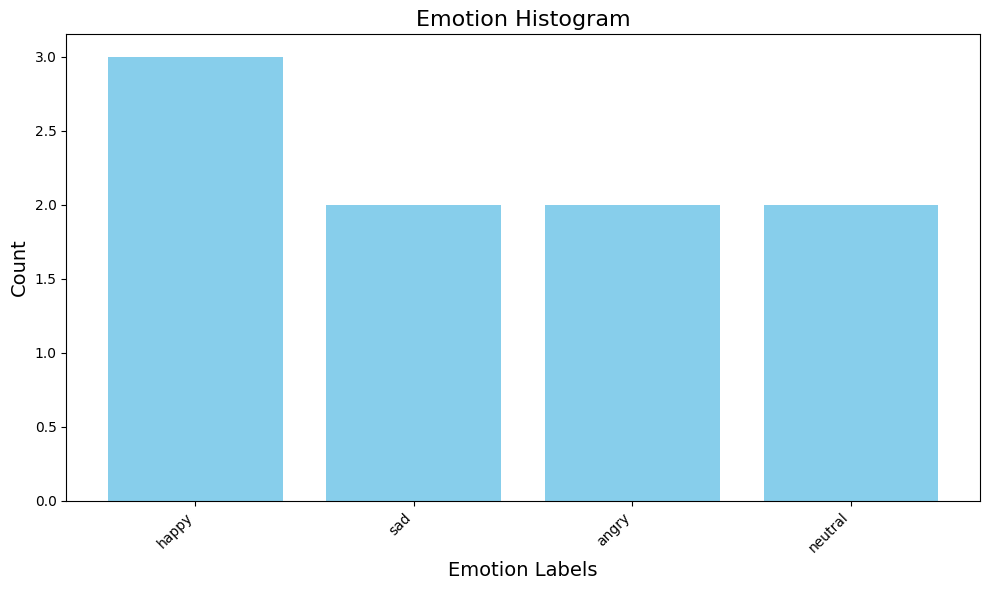

In [ ]:
import matplotlib.pyplot as plt

def plot_emotion_histogram(emotion_labels):

    label_counts = {}
    for label in emotion_labels:
        label_counts[label] = label_counts.get(label, 0) + 1

    labels, counts = zip(*label_counts.items())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Emotion Labels', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Emotion Histogram', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    emotion_labels = ['happy', 'sad', 'angry', 'happy', 'happy', 'sad', 'neutral', 'neutral', 'angry']

    plot_emotion_histogram(emotion_labels)

<ipython-input-17-4aea3e49e730>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


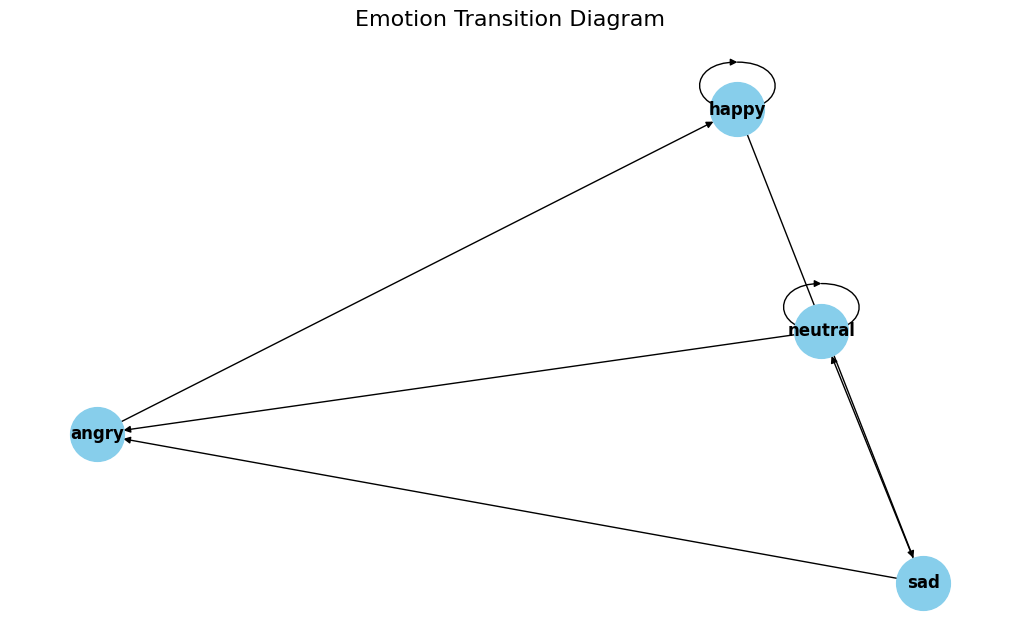

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_emotion_transition_diagram(emotion_labels):

    G = nx.DiGraph()

    prev_emotion = emotion_labels[0]
    for current_emotion in emotion_labels[1:]:
        G.add_edge(prev_emotion, current_emotion)
        prev_emotion = current_emotion

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold')
    plt.title('Emotion Transition Diagram', fontsize=16)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    emotion_labels = ['happy', 'sad', 'angry', 'happy', 'happy', 'sad', 'neutral', 'neutral', 'angry']

    plot_emotion_transition_diagram(emotion_labels)

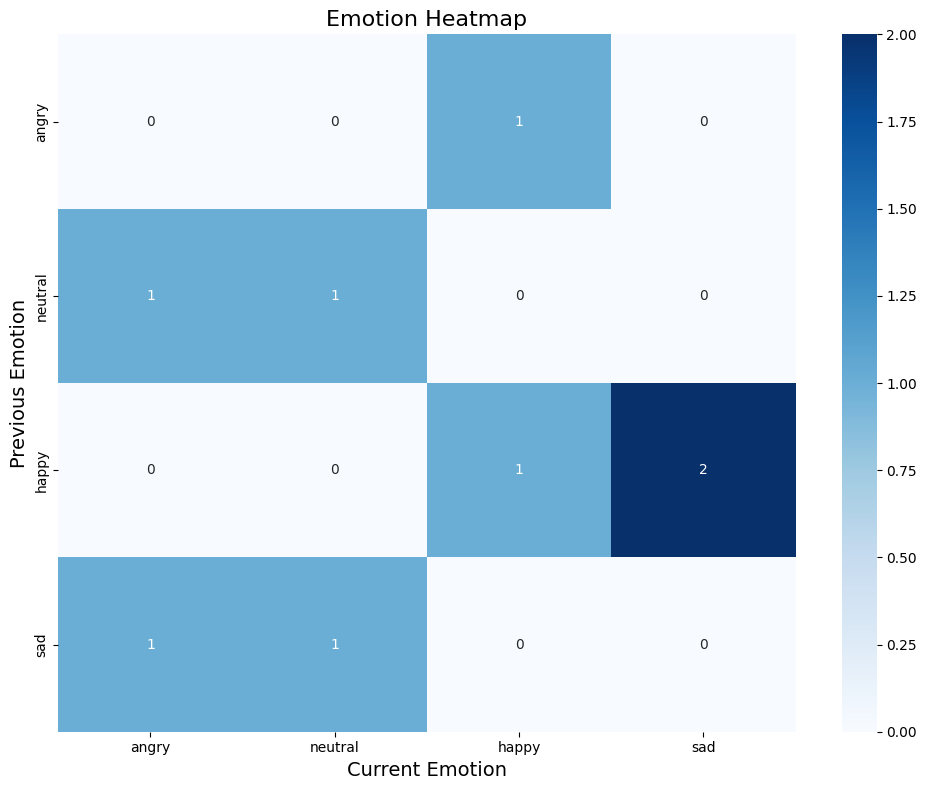

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_emotion_heatmap(emotion_labels):

    label_pairs_counts = {}
    prev_emotion = emotion_labels[0]
    for current_emotion in emotion_labels[1:]:
        edge = (prev_emotion, current_emotion)
        label_pairs_counts[edge] = label_pairs_counts.get(edge, 0) + 1
        prev_emotion = current_emotion

    unique_emotions = list(set(emotion_labels))

    heatmap_data = np.zeros((len(unique_emotions), len(unique_emotions)))

    for i, emotion1 in enumerate(unique_emotions):
        for j, emotion2 in enumerate(unique_emotions):
            heatmap_data[i, j] = label_pairs_counts.get((emotion1, emotion2), 0)

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True,cmap='Blues', xticklabels=unique_emotions, yticklabels=unique_emotions)
    plt.title('Emotion Heatmap', fontsize=16)
    plt.xlabel('Current Emotion', fontsize=14)
    plt.ylabel('Previous Emotion', fontsize=14)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    emotion_labels = ['happy', 'sad', 'angry', 'happy', 'happy', 'sad', 'neutral', 'neutral', 'angry']

    plot_emotion_heatmap(emotion_labels)

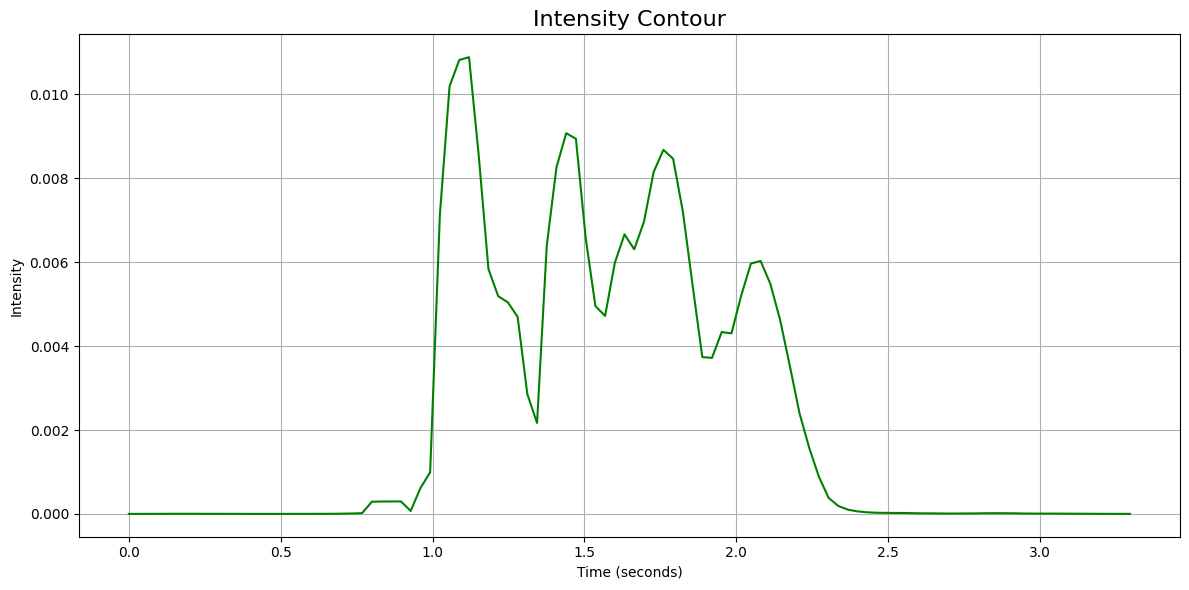

In [ ]:
import librosa
import matplotlib.pyplot as plt

def plot_intensity_contour(audio_file):

    y, sr = librosa.load(audio_file, sr=None)

    rms = librosa.feature.rms(y=y)

    time = librosa.times_like(rms, sr=sr)

    plt.figure(figsize=(12, 6))
    plt.plot(time, rms[0], color='green')
    plt.title('Intensity Contour', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Intensity')
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    audio_file_path =  "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"

    plot_intensity_contour(audio_file_path)

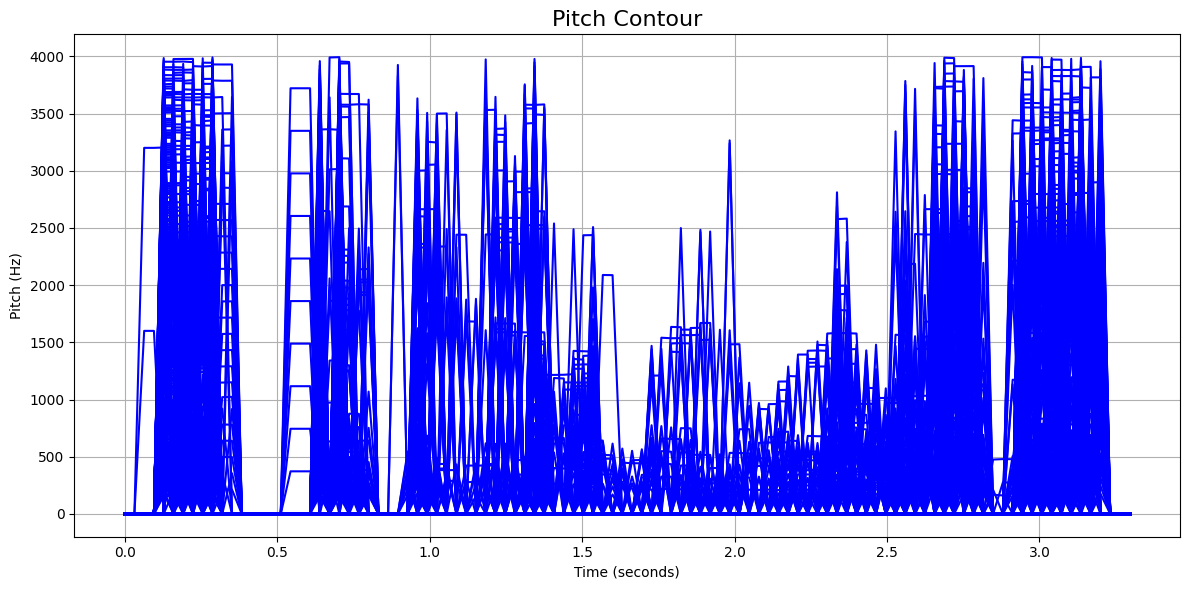

In [ ]:
import librosa
import matplotlib.pyplot as plt

def plot_pitch_contour(audio_file):

    y, sr = librosa.load(audio_file, sr=None)

    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    time = librosa.times_like(pitches, sr=sr)

    plt.figure(figsize=(12, 6))
    plt.plot(time, pitches.T, color='blue')
    plt.title('Pitch Contour', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Pitch (Hz)')
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    audio_file_path = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav"

    plot_pitch_contour(audio_file_path)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.49350649, 0.3943662 , 0.49180328, 0.53714286])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,happy
2,disgust,happy
3,calm,calm
4,happy,happy
5,calm,disgust
6,happy,happy
7,happy,happy
8,disgust,disgust
9,calm,calm


In [ ]:
import pickle
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

feature=extract_feature("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['happy'], dtype='<U7')

In [ ]:
feature

array([[-7.04823425e+02,  6.53288727e+01, -9.19415855e+00,
         2.13759346e+01, -2.19000325e-01,  6.97934771e+00,
        -8.27524948e+00,  2.18102723e-01, -1.30709763e+01,
        -2.21690655e+00,  1.03323686e+00, -4.23244810e+00,
         3.54141784e+00,  5.58143854e-01,  5.48493326e-01,
         4.71542627e-01,  4.73784119e-01,  5.25191963e-01,
         5.29903471e-01,  5.71941912e-01,  6.04967833e-01,
         6.30566120e-01,  5.98015845e-01,  5.77523708e-01,
         4.97576684e-01,  1.39239830e-06,  5.60121152e-05,
         3.62368487e-03,  2.09439714e-02,  3.13961394e-02,
         1.76842660e-02,  3.45229614e-03,  1.86057873e-02,
         2.46685632e-02,  2.04533935e-02,  2.19565798e-02,
         1.07420925e-02,  7.94340484e-03,  7.29931472e-03,
         1.51041951e-02,  3.63941491e-02,  4.98254746e-02,
         1.29398555e-02,  9.52597149e-03,  1.82860326e-02,
         3.88188176e-02,  1.36699220e-02,  2.03850423e-03,
         3.92225571e-03,  1.24087352e-02,  1.84398238e-0